<a href="https://colab.research.google.com/github/MLopita/App-Insight-Data-Analysis/blob/main/App_Insight_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**DATA CLEANING**

In [7]:
print(df['App'].nunique())
print(df['App'].duplicated().sum())

9660
1181


In [8]:
df = df.drop_duplicates(subset=['App'])

In [9]:
print(df['App'].nunique())
print(df['App'].duplicated().sum())

9660
0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Rating'].isna().sum()

np.int64(1463)

In [12]:
avg_rating = df['Rating'].mean()
df['Rating'].fillna(avg_rating, inplace=True)

/tmp/ipython-input-2920554756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(avg_rating, inplace=True)


In [13]:
df['Rating'].isna().sum()

np.int64(0)

In [14]:
print(df['Rating'].dtype)

float64


In [15]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [16]:
print(df['Reviews'].dtype)
print(df['Reviews'].head())

float64
0       159.0
1       967.0
2     87510.0
3    215644.0
4       967.0
Name: Reviews, dtype: float64


In [17]:
df['Reviews'] = df['Reviews'].fillna(0).astype(int)

In [18]:
df['Reviews'] = df['Reviews'].astype(int)

In [19]:
print(df['Reviews'].dtype)

int64


In [20]:
def convert_size(value):
    if value == "Varies with device":
        return np.nan
    elif isinstance(value, str) and value.endswith('M'):
        return float(value[:-1])
    elif isinstance(value, str) and value.endswith('k'):
        return float(value[:-1]) / 1000
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)

In [21]:
print(df['Size'].head(10))
print(df['Size'].dtype)

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
5     5.6
6    19.0
7    29.0
8    33.0
9     3.1
Name: Size, dtype: float64
float64


In [22]:
df.rename(columns={'Size': 'Size (in MB)'}, inplace=True)

In [23]:
df['Installs'] = df['Installs'].str.replace(r'[\+,]', '', regex=True)

In [24]:
df['Installs'] = df['Installs'].replace('Free', np.nan)

In [25]:
df['Installs'] = pd.to_numeric(df['Installs'],errors='coerce')

In [26]:
df['Installs'] = df['Installs'].astype('Int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   int64  
 4   Size (in MB)    8432 non-null   float64
 5   Installs        9659 non-null   Int64  
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: Int64(1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


In [28]:
df['Type'].isna().sum()

np.int64(1)

In [29]:
df = df[df['Type'] != '0']
df = df[df['Type'] != '']
df = df.dropna(subset=['Type'])

In [30]:
print(df['Type'].unique())

['Free' 'Paid']


In [31]:
df['Price'] = df['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True)

In [32]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [33]:
df['Price'] = df['Price'].fillna(0)

In [34]:
print(df['Price'].unique()[:10])

[0.   4.99 3.99 6.99 1.49 2.99 7.99 5.99 3.49 1.99]


In [35]:
df.rename(columns={'Price': 'Price (in $)'}, inplace=True)

In [36]:
df['Content Rating'].isna().sum()

np.int64(0)

In [37]:
df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)

/tmp/ipython-input-106931592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)


In [38]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [39]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [40]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [41]:
print(df["Current Ver"].value_counts())


Current Ver
Varies with device    1054
1.0                    799
1.1                    260
1.2                    176
2.0                    149
                      ... 
0.7.1                    1
4.6.71                   1
2.0.148.0                1
1.0.0.96                 1
1.022                    1
Name: count, Length: 2817, dtype: int64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9658 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9658 non-null   object        
 1   Category        9658 non-null   object        
 2   Rating          9658 non-null   float64       
 3   Reviews         9658 non-null   int64         
 4   Size (in MB)    8432 non-null   float64       
 5   Installs        9658 non-null   Int64         
 6   Type            9658 non-null   object        
 7   Price (in $)    9658 non-null   float64       
 8   Content Rating  9658 non-null   object        
 9   Genres          9658 non-null   object        
 10  Last Updated    9658 non-null   datetime64[ns]
 11  Current Ver     9650 non-null   object        
 12  Android Ver     9656 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 1.0+ MB


In [43]:
df.to_csv("cleaned_googleplaystore.csv", index=False)

**Basic Level Questions**

1. What is the average rating of apps in the dataset?

In [44]:
avg_rating = df['Rating'].mean()
print("Average App Rating:", round(avg_rating,1))

Average App Rating: 4.2


2. How many unique categories of apps are there?

In [45]:
unique_categories = df['Category'].nunique()
print("Number of unique app categories:", unique_categories)
print("\nList of categories:")
print(df['Category'].unique())

Number of unique app categories: 33

List of categories:
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [46]:
df = df[df['Category'] != '1.9']

In [47]:
unique_categories = df['Category'].nunique()
print("Number of unique app categories:", unique_categories)
print("\nList of categories:")
print(df['Category'].unique())

Number of unique app categories: 33

List of categories:
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


3. What is the distribution of app sizes?

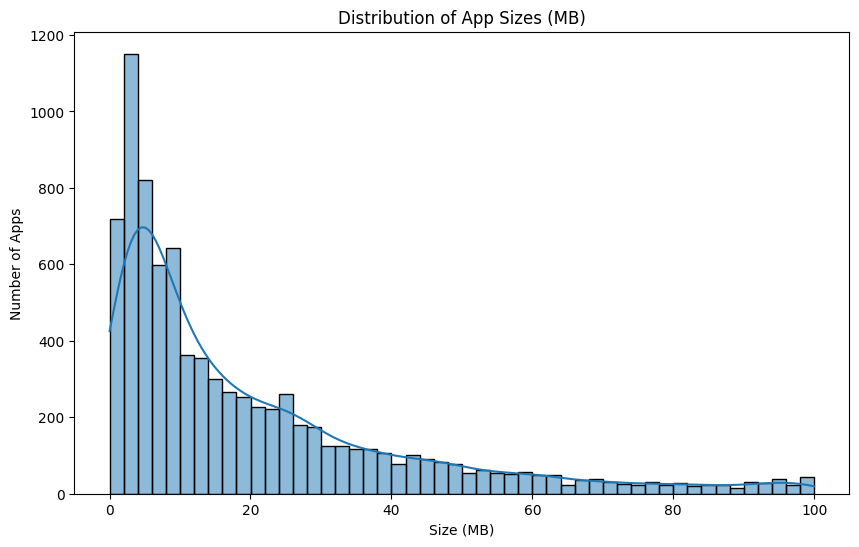

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Size (in MB)'].dropna(), bins=50, kde=True)
plt.title("Distribution of App Sizes (MB)")
plt.xlabel("Size (MB)")
plt.ylabel("Number of Apps")
plt.show()

4. How many free vs paid apps are there?

In [49]:
type_counts = df['Type'].value_counts()
print(type_counts)

Type
Free    8902
Paid     756
Name: count, dtype: int64


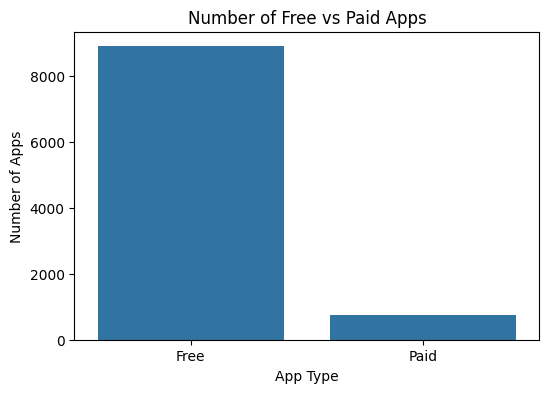

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df)
plt.title('Number of Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Number of Apps')
plt.show()

5. What is the most common content rating for apps?

In [51]:
common_content = df['Content Rating'].mode()[0]
print("Most common content rating:", common_content)

Most common content rating: Everyone


6. What are the top 5 most installed apps?

In [52]:
top_installed = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(5)
print(top_installed)

                    App    Installs
865   Google Play Games  1000000000
1654     Subway Surfers  1000000000
3736        Google News  1000000000
3665            YouTube  1000000000
152   Google Play Books  1000000000


7. How many apps have a rating of 4.0 and above?

In [53]:
high_rating_count = df[df['Rating'] >= 4.0].shape[0]
print("Number of apps with rating >= 4.0:", high_rating_count)

Number of apps with rating >= 4.0: 7748


8. What is the average number of reviews for free vs paid apps?

In [54]:
avg_reviews = df.groupby('Type')['Reviews'].mean()
print(round(avg_reviews))

Type
Free    234270.0
Paid      8725.0
Name: Reviews, dtype: float64


9. What is the average app size for each category?

In [55]:
avg_size_per_category = df.groupby('Category')['Size (in MB)'].mean().sort_values(ascending=False)
print(round(avg_size_per_category,1))

Category
GAME                   41.9
FAMILY                 27.2
TRAVEL_AND_LOCAL       24.2
SPORTS                 24.1
ENTERTAINMENT          23.0
PARENTING              22.5
HEALTH_AND_FITNESS     20.7
FOOD_AND_DRINK         20.5
AUTO_AND_VEHICLES      20.0
MEDICAL                19.2
EDUCATION              19.1
FINANCE                17.4
MAPS_AND_NAVIGATION    16.4
SOCIAL                 16.0
HOUSE_AND_HOME         16.0
VIDEO_PLAYERS          15.8
PHOTOGRAPHY            15.7
DATING                 15.7
SHOPPING               15.5
LIFESTYLE              14.8
EVENTS                 14.0
BUSINESS               13.9
BEAUTY                 13.8
COMICS                 13.8
BOOKS_AND_REFERENCE    13.1
WEATHER                12.7
NEWS_AND_MAGAZINES     12.5
ART_AND_DESIGN         12.4
PRODUCTIVITY           12.3
COMMUNICATION          11.3
PERSONALIZATION        11.2
LIBRARIES_AND_DEMO     10.6
TOOLS                   8.8
Name: Size (in MB), dtype: float64


10. How many apps were last updated in 2018?

In [56]:
apps_updated_2018 = df[df['Last Updated'].dt.year == 2018].shape[0]
print("Number of apps updated in 2018:", apps_updated_2018)

Number of apps updated in 2018: 6283


**Medium-Level Questions:**

1. What is the correlation between the number of installs and the app rating?

In [57]:
correlation = df['Installs'].corr(df['Rating'])
print("Correlation between Installs and Rating:", round(correlation, 3))

Correlation between Installs and Rating: 0.04


2. Which app categories have the highest average rating?

In [58]:
category_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(round(category_ratings,2).head(10))

Category
EDUCATION              4.36
EVENTS                 4.36
ART_AND_DESIGN         4.35
BOOKS_AND_REFERENCE    4.30
PERSONALIZATION        4.30
PARENTING              4.28
BEAUTY                 4.26
GAME                   4.24
WEATHER                4.24
SOCIAL                 4.24
Name: Rating, dtype: float64


3. How does the price of an app affect its average rating?

In [59]:
paid_apps = df[df['Price (in $)'] > 0]
price_ratings = paid_apps.groupby('Price (in $)')['Rating'].mean().sort_values(ascending=False)
print(round(price_ratings,3))

Price (in $)
1.75      5.0
3.04      5.0
2.50      4.8
2.59      4.7
19.40     4.7
         ... 
2.56      3.4
15.46     3.4
4.60      3.4
379.99    2.9
4.59      2.0
Name: Rating, Length: 91, dtype: float64


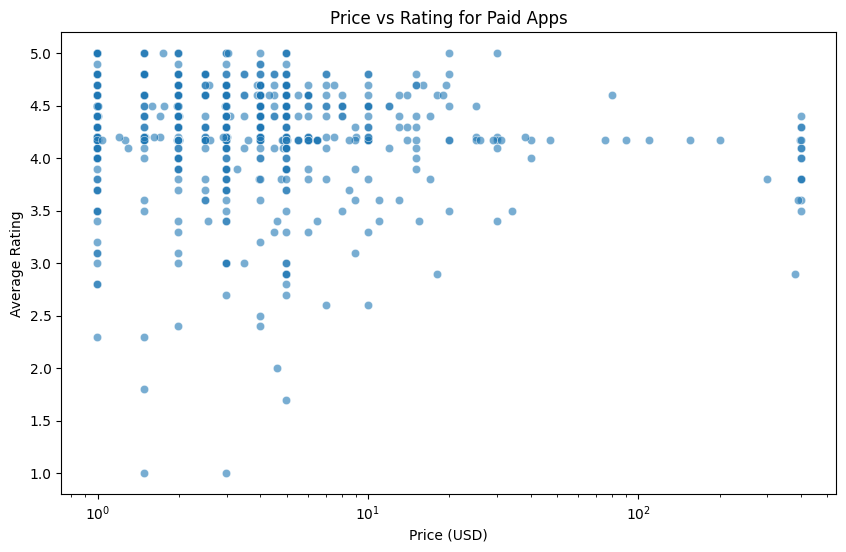

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price (in $)', y='Rating', data=paid_apps, alpha=0.6)
plt.title('Price vs Rating for Paid Apps')
plt.xlabel('Price (USD)')
plt.ylabel('Average Rating')
plt.xscale('log')
plt.show()

4. What is the distribution of app ratings across different content ratings?

/tmp/ipython-input-3783473624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set2')


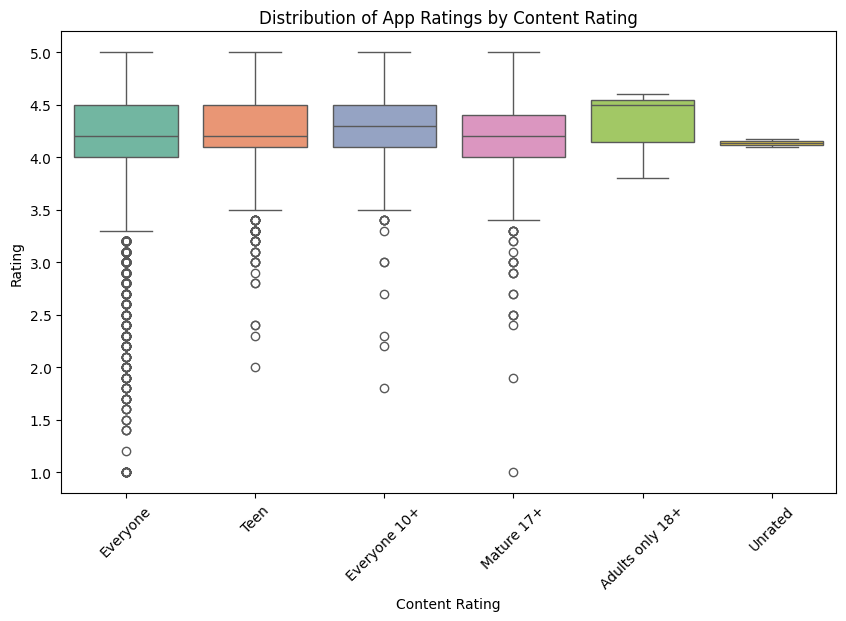

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set2')
plt.title('Distribution of App Ratings by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

5. Which genres have the most apps with over 1 million installs?

In [62]:
high_install_apps = df[df['Installs'] > 1_000_000]
genre_counts = high_install_apps['Genres'].value_counts()
print(genre_counts)

Genres
Tools                               172
Action                              128
Photography                         123
Communication                        99
Productivity                         91
                                   ... 
Parenting                             1
Card;Action & Adventure               1
Entertainment;Action & Adventure      1
Sports;Action & Adventure             1
Role Playing;Brain Games              1
Name: count, Length: 88, dtype: int64


6. How frequently do apps get updated? Calculate the average time between updates.

In [63]:
min_date = df['Last Updated'].min()
max_date = df['Last Updated'].max()
overall_update_range = max_date - min_date
print("Overall dataset update range:", overall_update_range)

Overall dataset update range: 3001 days 00:00:00


In [64]:
updates_per_year = df['Last Updated'].dt.year.value_counts().sort_index()
print(updates_per_year)

Last Updated
2010       1
2011      15
2012      26
2013     108
2014     203
2015     449
2016     779
2017    1794
2018    6283
Name: count, dtype: int64


In [65]:
avg_days_since_update = (pd.Timestamp.now() - df['Last Updated']).mean()
print("Average days since last update:", avg_days_since_update)

Average days since last update: 2877 days 23:22:55.114363584


7. What is the impact of app size on the number of installs?

In [66]:
corr_size_installs = df['Size (in MB)'].corr(df['Installs'])
print("Correlation between App Size and Installs:", round(corr_size_installs, 3))

Correlation between App Size and Installs: 0.134


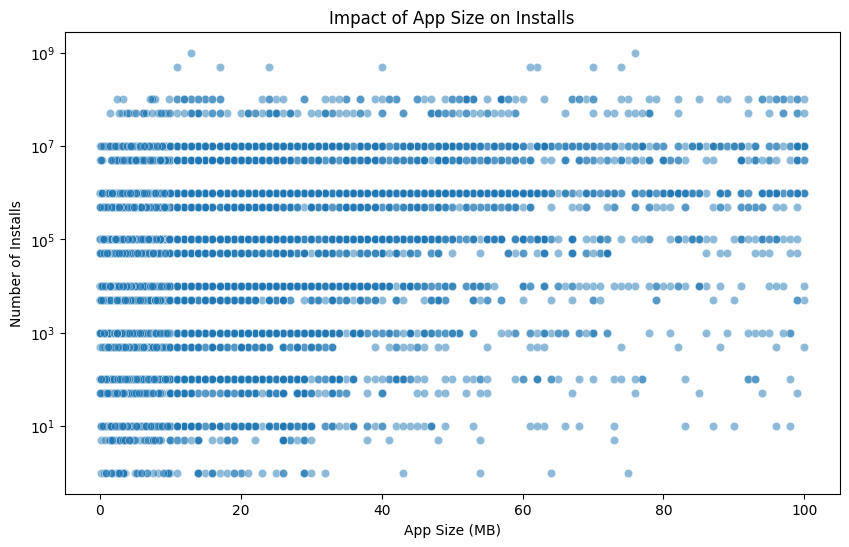

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size (in MB)', y='Installs', data=df, alpha=0.5)
plt.title('Impact of App Size on Installs')
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Installs')
plt.yscale('log')
plt.show()

Q8: Which apps have the highest number of reviews, and what are their ratings?

In [68]:
top_reviews = df.sort_values(by='Reviews', ascending=False).head(10)

print(top_reviews[['App', 'Reviews', 'Rating']])

                                                    App   Reviews  Rating
2544                                           Facebook  78158306     4.1
336                                  WhatsApp Messenger  69119316     4.4
2545                                          Instagram  66577313     4.5
335            Messenger – Text and Video Chat for Free  56642847     4.0
1670                                     Clash of Clans  44891723     4.6
4005            Clean Master- Space Cleaner & Antivirus  42916526     4.7
1654                                     Subway Surfers  27722264     4.5
3665                                            YouTube  25655305     4.3
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999     4.7
1660                                       Clash Royale  23133508     4.6


9. How does the content rating distribution differ between free and paid apps?

In [69]:
crosstab = pd.crosstab(df['Content Rating'], df['Type'])
print(crosstab)
crosstab_percent = pd.crosstab(df['Content Rating'], df['Type'], normalize='index') * 100
print(crosstab_percent)

Type             Free  Paid
Content Rating             
Adults only 18+     3     0
Everyone         7248   655
Everyone 10+      290    31
Mature 17+        375    18
Teen              984    52
Unrated             2     0
Type                   Free      Paid
Content Rating                       
Adults only 18+  100.000000  0.000000
Everyone          91.712008  8.287992
Everyone 10+      90.342679  9.657321
Mature 17+        95.419847  4.580153
Teen              94.980695  5.019305
Unrated          100.000000  0.000000


10. What are the top 5 categories with the most installs?

In [70]:
category_installs = df.groupby("Category")["Installs"].sum().sort_values(ascending=False)
top5_categories = category_installs.head(5)
print("Top 5 Categories with Most Installs:")
print(top5_categories)

Top 5 Categories with Most Installs:
Category
GAME             13878924415
COMMUNICATION    11038276251
TOOLS             8001771915
PRODUCTIVITY      5793091369
SOCIAL            5487867902
Name: Installs, dtype: Int64


**Advanced-Level Questions:**
1. What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?

In [71]:
top10_apps = df.sort_values(by=["Rating", "Reviews"], ascending=[False, False]).head(10)
top10_apps = top10_apps[["App", "Rating", "Reviews", "Installs"]]

print("Top 10 Apps with Highest Ratings:")
print(top10_apps)

Top 10 Apps with Highest Ratings:
                                                     App  Rating  Reviews  \
10357                                         Ríos de Fe     5.0      141   
10301  FD Calculator (EMI, SIP, RD & Loan Eligilibility)     5.0      104   
8058                                          Oración CX     5.0      103   
6823                      Barisal University App-BU Face     5.0      100   
9496                                          Master E.K     5.0       90   
7506                                             CL REPL     5.0       47   
5230                                              AJ Cam     5.0       44   
5196    AI Today : Artificial Intelligence News & AI 101     5.0       43   
7842                         CS & IT Interview Questions     5.0       43   
9517                                             Ek Vote     5.0       43   

       Installs  
10357      1000  
10301      1000  
8058       5000  
6823       1000  
9496       1000  
7506      

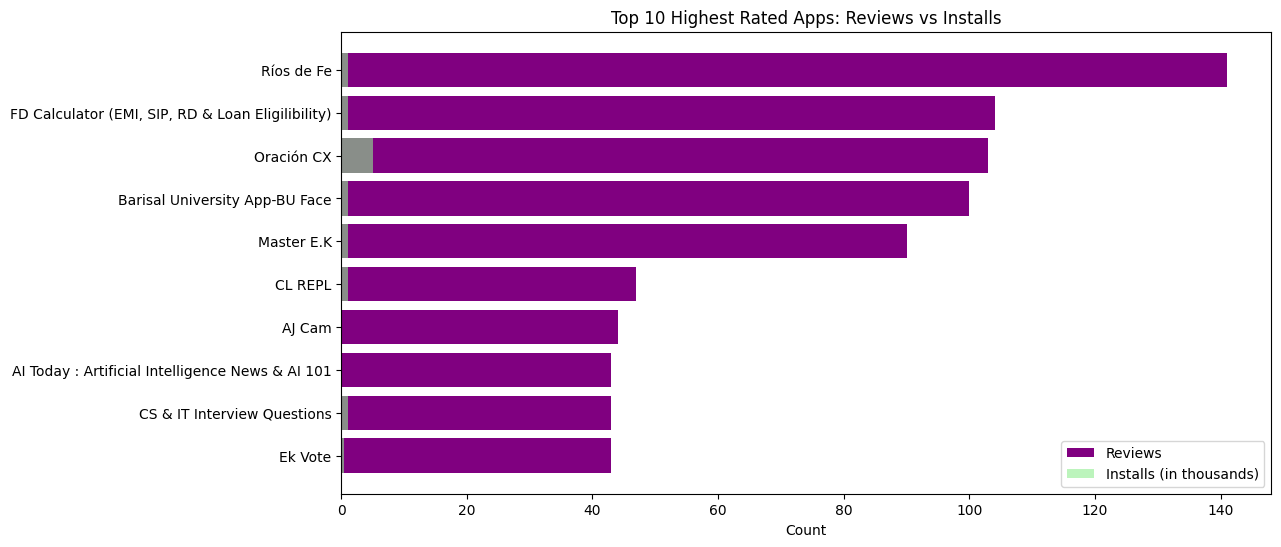

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(top10_apps["App"], top10_apps["Reviews"], color="Purple", label="Reviews")
plt.barh(top10_apps["App"], top10_apps["Installs"]/1000, color="lightgreen", alpha=0.6, label="Installs (in thousands)")

plt.xlabel("Count")
plt.title("Top 10 Highest Rated Apps: Reviews vs Installs")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


2. Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?

In [73]:
df["Update_Month"] = df["Last Updated"].dt.to_period("M")
updates_trend = df.groupby("Update_Month").size().reset_index(name="Update_Count")
print(updates_trend.head())

  Update_Month  Update_Count
0      2010-05             1
1      2011-01             1
2      2011-03             1
3      2011-04             3
4      2011-05             1


In [74]:
df = df.dropna(subset=["Last Updated"])

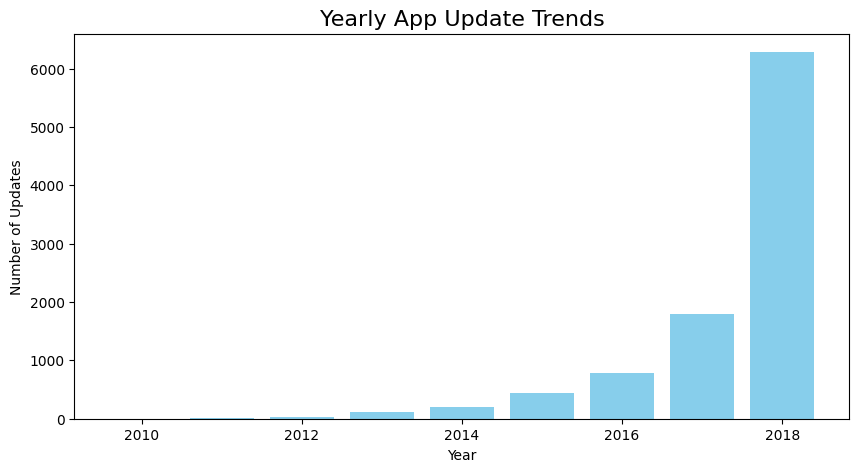

In [75]:
df["Update_Year"] = df["Last Updated"].dt.year
yearly_updates = df.groupby("Update_Year").size().reset_index(name="Update_Count")

plt.figure(figsize=(10,5))
plt.bar(yearly_updates["Update_Year"], yearly_updates["Update_Count"], color="skyblue")
plt.title("Yearly App Update Trends", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Updates")
plt.show()


/tmp/ipython-input-1986896984.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="Update_Count", data=seasonal_trend, palette="viridis")


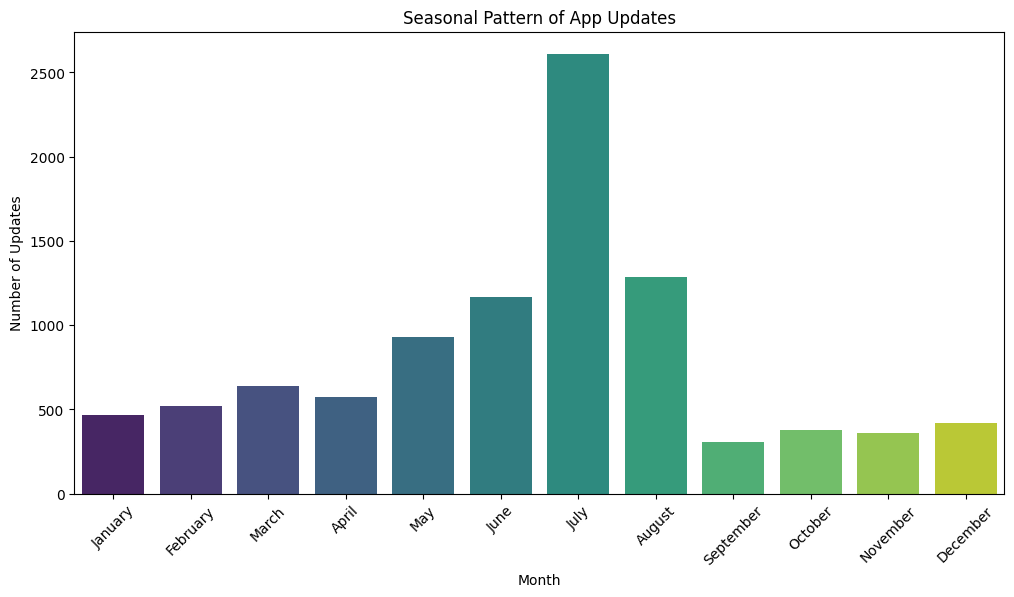

In [76]:
df["Month"] = df["Last Updated"].dt.month_name()

seasonal_trend = df.groupby("Month").size().reindex(
    ["January","February","March","April","May","June",
     "July","August","September","October","November","December"]
).reset_index(name="Update_Count")

plt.figure(figsize=(12,6))
sns.barplot(x="Month", y="Update_Count", data=seasonal_trend, palette="viridis")

plt.xticks(rotation=45)
plt.title("Seasonal Pattern of App Updates")
plt.xlabel("Month")
plt.ylabel("Number of Updates")
plt.show()


3. How does the average rating of apps change with the number of installs? Create a binned analysis.

In [77]:
bins = [0, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]
labels = ["<1K", "1K-10K", "10K-100K", "100K-1M", "1M-10M", "10M-100M", "100M+"]
df["Install_Bins"] = pd.cut(df["Installs"], bins=bins, labels=labels, include_lowest=True)

In [78]:
rating_by_installs = df.groupby("Install_Bins")["Rating"].mean().reset_index()
print(rating_by_installs)

  Install_Bins    Rating
0          <1K  4.186564
1       1K-10K  4.039646
2     10K-100K  4.096933
3      100K-1M  4.203759
4       1M-10M  4.271049
5     10M-100M  4.359231
6        100M+  4.302273


/tmp/ipython-input-2853544670.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_installs = df.groupby("Install_Bins")["Rating"].mean().reset_index()


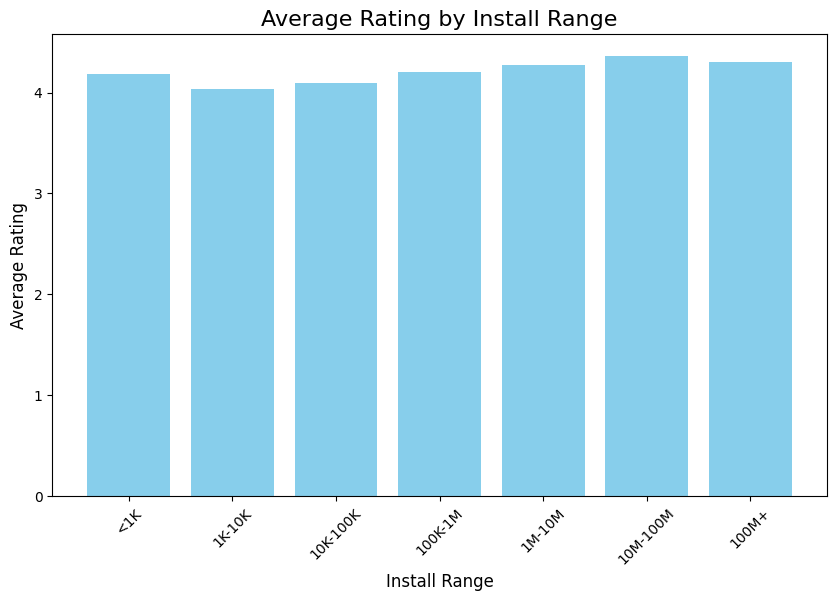

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(rating_by_installs["Install_Bins"], rating_by_installs["Rating"], color="skyblue")

plt.title("Average Rating by Install Range", fontsize=16)
plt.xlabel("Install Range", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45)
plt.show()

4. 5. What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?

In [80]:
genre_ratings = df.groupby("Genres")["Rating"].agg(["mean", "median", "count"]).reset_index()
genre_ratings = genre_ratings.sort_values(by="mean", ascending=False)

genre_ratings.head(10)

,Genres,mean,median,count
18,Board;Pretend Play,4.800000,4.8,1
34,Comics;Creativity,4.800000,4.8,1
63,Health & Fitness;Education,4.700000,4.7,1
4,Adventure;Brain Games,4.600000,4.6,1
86,Puzzle;Education,4.600000,4.6,1
104,Strategy;Action & Adventure,4.600000,4.6,2
54,Entertainment;Creativity,4.533333,4.6,3
73,Music;Music & Video,4.533333,4.6,3
106,Strategy;Education,4.500000,4.5,1
89,Racing;Pretend Play,4.500000,4.5,1
